In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [29]:
data = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df = data.copy()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [31]:
df = df.drop(['Rainfall','Evaporation','Sunshine','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm',
              'Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow','Date'], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   WindGustDir    135134 non-null  object 
 4   WindGustSpeed  135197 non-null  float64
 5   WindSpeed9am   143693 non-null  float64
 6   WindSpeed3pm   142398 non-null  float64
 7   Pressure9am    130395 non-null  float64
 8   Pressure3pm    130432 non-null  float64
dtypes: float64(7), object(2)
memory usage: 10.0+ MB


In [33]:

df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
WindGustDir      10326
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Pressure9am      15065
Pressure3pm      15028
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.describe()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm
count,123816.000000,123816.000000,123816.000000,123816.000000,123816.000000,123816.000000,123816.000000
mean,12.426824,23.527480,40.130759,14.378529,19.068876,1017.632822,1015.224429
std,6.380143,7.020568,13.482715,8.799985,8.665228,7.099795,7.029468
min,-8.200000,2.600000,6.000000,0.000000,0.000000,980.500000,977.100000
25%,7.800000,18.100000,31.000000,7.000000,13.000000,1012.900000,1010.400000
50%,12.200000,22.950000,39.000000,13.000000,19.000000,1017.600000,1015.200000
75%,17.100000,28.600000,48.000000,20.000000,24.000000,1022.400000,1020.000000
max,33.900000,48.100000,135.000000,87.000000,87.000000,1041.000000,1039.600000


In [36]:
df.duplicated().value_counts()

False    123816
dtype: int64

In [37]:
df = df.drop_duplicates()

In [38]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

Data shape: (123816, 9)
___________________________
Data Types:
float64    7
object     2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Location,object,123816,44,0,Adelaide,Woomera
MaxTemp,float64,123816,413,0,2.6,48.1
MinTemp,float64,123816,381,0,-8.2,33.9
Pressure3pm,float64,123816,543,0,977.1,1039.6
Pressure9am,float64,123816,545,0,980.5,1041.0
WindGustDir,object,123816,16,0,E,WSW
WindGustSpeed,float64,123816,67,0,6.0,135.0
WindSpeed3pm,float64,123816,42,0,0.0,87.0
WindSpeed9am,float64,123816,40,0,0.0,87.0


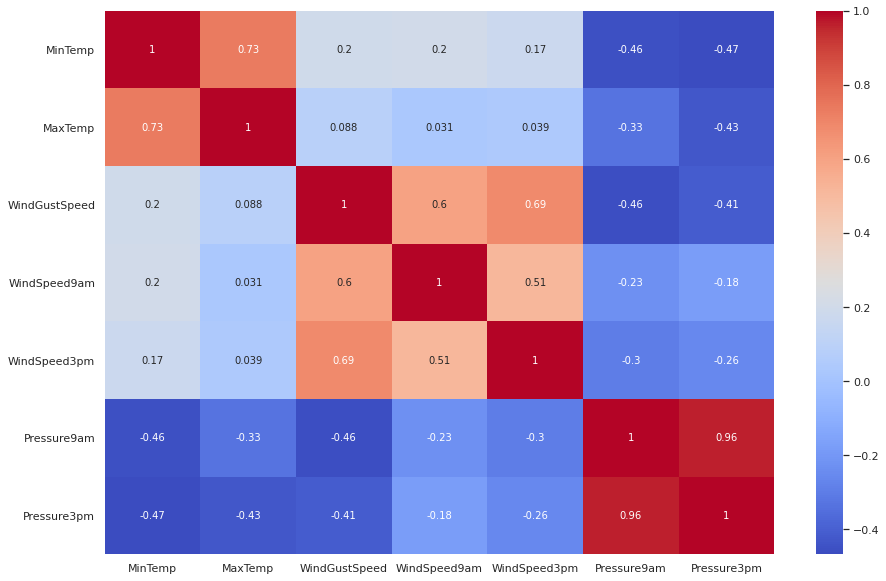

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

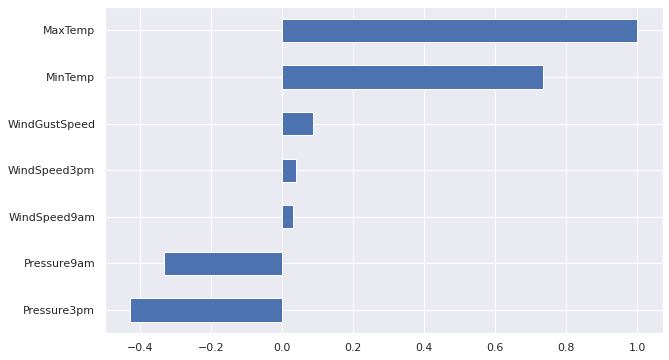

In [40]:
plt.figure(figsize=(10,6))
df.corr()["MaxTemp"].sort_values().plot.barh();

In [41]:
df_notdummy=df.copy()
df= pd.get_dummies(df)
df.head(2)

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Location_Adelaide,Location_Albury,Location_AliceSprings,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,44.0,20.0,24.0,1007.7,1007.1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,44.0,4.0,22.0,1010.6,1007.8,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:

df_notdummy.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm
0,Albury,13.4,22.9,W,44.0,20.0,24.0,1007.7,1007.1
1,Albury,7.4,25.1,WNW,44.0,4.0,22.0,1010.6,1007.8
2,Albury,12.9,25.7,WSW,46.0,19.0,26.0,1007.6,1008.7
3,Albury,9.2,28.0,NE,24.0,11.0,9.0,1017.6,1012.8
4,Albury,17.5,32.3,W,41.0,7.0,20.0,1010.8,1006.0


# ML Modelling

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

In [45]:
X=df.drop(["MaxTemp"], axis=1)
y=df["MaxTemp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [47]:
def eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, model):
    cv_score = cross_val_score(estimator=model, X=X_test, y=y_test, cv=10).mean()
    cv_RMSEs = cross_val_score(estimator=model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
    cv_rmse = np.sqrt(-cv_RMSEs.mean())
    
    rmse = [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_train, y_pred_train)), cv_rmse]
    mae = [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_train, y_pred_train)]
    mse = [mean_squared_error(y_test, y_pred) , mean_squared_error(y_train, y_pred_train) ]
    score = [r2_score(y_test, y_pred), r2_score(y_train, y_pred_train), cv_score]
    dic = {'R2_Score':score, 
#      'MAE':mae, 
#      'MSE':mse, 
     'RMSE':rmse} 
#     return pd.Series(dic).to_frame().rename(columns={0:"Test", 1:'Train'})
    return pd.DataFrame(dic).T.rename(columns={0:"Test", 1:'Train', 2:'Cross_Val'})

# 1- Linear Regression¶

In [48]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [49]:
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

In [50]:
lin_reg = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lr)
lin_reg

,Test,Train,Cross_Val
R2_Score,0.713682,0.715177,0.713112
RMSE,3.749885,3.749012,3.752648


# 2.Ridge Regression

In [51]:
ridge_model=Ridge(normalize=True)
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

In [52]:
y_pred=ridge_model.predict(X_test)
y_pred_train=ridge_model.predict(X_train)

In [53]:
eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, ridge_model)

,Test,Train,Cross_Val
R2_Score,0.529027,0.531975,0.527904
RMSE,4.809407,4.805773,4.814696


In [54]:
alpha_space = np.linspace(0.01, 5, 50)

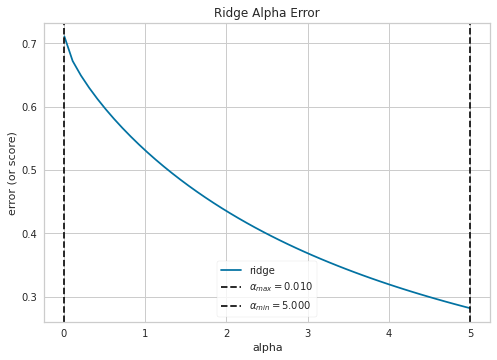

In [55]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space 

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)

visualizer.fit(X_train, y_train)
visualizer.show();

In [56]:
ridge_model = Ridge(0.001, normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)

ridge = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, ridge_model)
ridge

,Test,Train,Cross_Val
R2_Score,0.713515,0.715112,0.713050
RMSE,3.750976,3.749434,3.753082


# 3.Lasso regression

In [57]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [59]:
y_pred=lasso_model.predict(X_test)
y_pred_train=lasso_model.predict(X_train)

In [60]:
eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lasso_model)

,Test,Train,Cross_Val
R2_Score,0.619194,0.621682,0.621132
RMSE,4.324596,4.320736,4.312850


In [61]:
alpha_space = np.linspace(0.01, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)

In [62]:
lasso_cv_model.alpha_

0.01

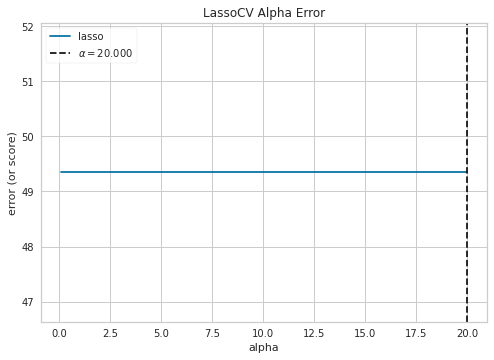

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [63]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()


In [65]:
lasso_model = Lasso(0.01).fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
y_pred_train=lasso_model.predict(X_train)

In [66]:
lasso = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lasso_model)
lasso

,Test,Train,Cross_Val
R2_Score,0.709804,0.710963,0.709167
RMSE,3.775190,3.776640,3.778369


# 4.Elastic Net

In [67]:
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.01, .1, .7,.9, .95, .99, 1])
elastic_model.fit(X_train,y_train)

ElasticNetCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
             l1_ratio=[0.01, 0.1, 0.7, 0.9, 0.95, 0.99, 1])

In [68]:
elastic_model.l1_ratio_

0.01

In [69]:
elastic_model.alpha_

0.1

In [71]:
y_pred = elastic_model.predict(X_test)
y_pred_train=elastic_model.predict(X_train)

In [73]:
elastic = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, elastic_model)
elastic

,Test,Train,Cross_Val
R2_Score,0.666039,0.667311,0.665852
RMSE,4.049872,4.051805,4.050041


# 5.Polynomial Regression

In [74]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [75]:
pol_model = LinearRegression(normalize=True)
pol_model.fit(X_poly_train,y_train)
y_pred=pol_model.predict(X_poly_test)
y_pred_train=pol_model.predict(X_poly_train)

In [76]:
polinom = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, pol_model)
polinom

,Test,Train,Cross_Val
R2_Score,0.769359,0.778832,0.713112
RMSE,3.365592,3.303617,3.752648


# Result

In [83]:

data = [lin_reg, ridge, lasso,elastic, polinom]
headers = ["Linear Reg.", "Ridge Model","Lasso Model","Elasticnet Model","Polinomial Reg."]
pd.concat(data, axis=1, keys=headers).T

R2_Score      RMSE
Linear Reg.      Test       0.713682  3.749885
                 Train      0.715177  3.749012
                 Cross_Val  0.713112  3.752648
Ridge Model      Test       0.713515  3.750976
                 Train      0.715112  3.749434
                 Cross_Val  0.713050  3.753082
Lasso Model      Test       0.709804  3.775190
                 Train      0.710963  3.776640
                 Cross_Val  0.709167  3.778369
Elasticnet Model Test       0.666039  4.049872
                 Train      0.667311  4.051805
                 Cross_Val  0.665852  4.050041
Polinomial Reg.  Test       0.769359  3.365592
                 Train      0.778832  3.303617
                 Cross_Val  0.713112  3.752648